In [3]:
import os
import sys
sys.path.append('../')
import numpy as np 
import cv2
import matplotlib.pyplot as plt
from omegaconf import OmegaConf

import torch
import torch.nn as nn

from sklearn.metrics import RocCurveDisplay

from Data.Station_data import StationDataloader
from Models.STFPM import STFPM
from Utils.Visualizer import plot_distribution, cal_best_threshold

In [4]:
args = OmegaConf.load('../Config/station_STFPM_config.yaml')
os.makedirs(args.experiment_path, exist_ok=True)
os.makedirs(args.checkpoint_save, exist_ok=True)
np.random.seed(0)
torch.manual_seed(0)
args

{'experiment_name': 'station', 'dataroot': '../Datasets/station', 'experiment_path': './Experiments/STFPM/station', 'weight_path': './Experiments/STFPM/best.pth.tar', 'checkpoint_save': './Experiments/STFPM/station/checkpoint', 'checkpoint_load': '../checkpoint/STFPM/Station/checkpoint/checkpoint_best.pt', 'log_path': './Experiments/STFPM/station/station.log', 'start_epoch': 1, 'finish_epoch': 200, 'manualseed': 42, 'batchSize': 64, 'imageSize_h': 172, 'imageSize_w': 128, 'lossSize_h': 86, 'lossSize_w': 64, 'device': 'gpu', 'gpu_ids': 0, 'ngpu': 1, 'lr': 0.4, 'momentum': 0.9, 'weight_decay': 0.0001, 'sample_interval': 20}

In [5]:
test_neg_loader, test_pos_loader = StationDataloader(args.dataroot, batchSize=args.batchSize, imageSize_h=args.imageSize_h, imageSize_w=args.imageSize_w, is_train=False)

In [6]:
Tester = STFPM(args)

/home/gin/miniconda3/envs/vdt/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/gin/miniconda3/envs/vdt/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/gin/miniconda3/envs/vdt/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


{'Epoch_loss': 0.6316292178630829, 'Val_loss': 0.009692138709148946}
Checpoint have been loaded.
Student'weight load fail.


In [7]:
Tester.load_checkpoint()

In [8]:
Tester.cal_auc(test_neg_loader, test_pos_loader)

(0.9326271186440677,
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True]),
 array([0.03601891, 0.04597865, 0.09846463, 0.0523722 , 0.08635901,
        0.06457727, 0.08880109, 0.08806645, 0.07173546, 0.03564298,
        0.05237283, 0.09252157, 0.07673142, 0.06435683, 0.07

In [9]:
scores_neg, scores_pos = Tester.get_scores(test_neg_loader, test_pos_loader)

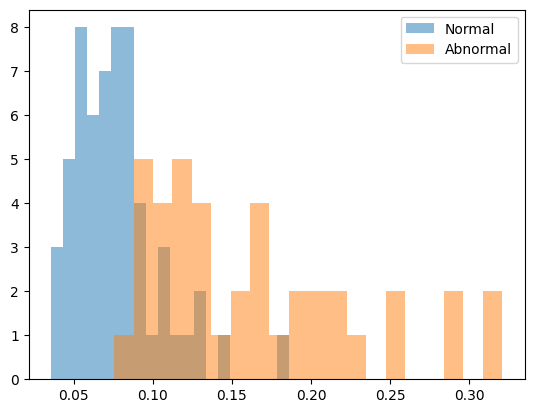

In [10]:
plot_distribution(scores_neg, scores_pos, 20)

In [11]:
list_labels = np.concatenate(([0] * len(scores_neg), [1] * len(scores_pos)))
list_errors = np.concatenate((scores_neg, scores_pos))

In [12]:
list_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
list_scores = (list_errors - np.min(list_errors)) / (np.max(list_errors) - np.min(list_errors))
list_scores

array([0.0013182 , 0.03624235, 0.22028607, 0.05866152, 0.17783734,
       0.10145899, 0.18640055, 0.18382451, 0.12655941, 0.        ,
       0.05866373, 0.19944656, 0.14407789, 0.10068599, 0.12556227,
       0.06755299, 0.05864374, 0.15398683, 0.03397973, 0.11658798,
       0.10218748, 0.20717203, 0.11192883, 0.15489527, 0.12846682,
       0.16615878, 0.05364719, 0.049068  , 0.14332035, 0.25879672,
       0.17895509, 0.03223369, 0.10572937, 0.07573917, 0.17797451,
       0.05418838, 0.09420168, 0.33124116, 0.08268614, 0.17132442,
       0.1338419 , 0.28298197, 0.14318912, 0.30104406, 0.11271611,
       0.17842674, 0.14685452, 0.37648252, 0.08968081, 0.32549824,
       0.20726985, 0.23791909, 0.13419074, 0.06159466, 0.02924372,
       0.00940873, 0.52801061, 0.25420288, 0.16422406, 0.29730221,
       0.46877156, 0.21252278, 0.59211663, 0.44583344, 0.36949841,
       0.30591891, 0.19253014, 0.35088121, 0.40409944, 0.26084839,
       0.33473328, 0.57841905, 0.68332401, 0.19703595, 0.63877

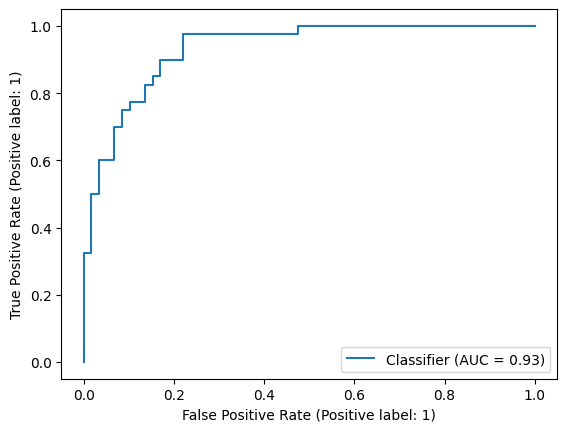

In [14]:
RocCurveDisplay.from_predictions(list_labels, list_scores)

In [15]:
best_thre, best_F1_score, best_F2_score, best_accuracy = cal_best_threshold(list_labels, list_scores)
best_thre, best_F1_score, best_F2_score, best_accuracy

(0.1906001573097994,
 0.8478260869565216,
 0.9198113207547169,
 0.8484848484848485)

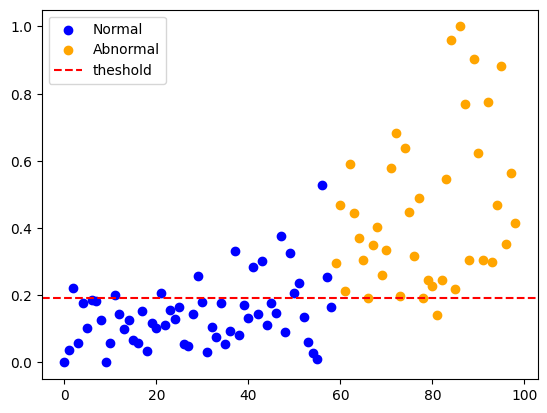

In [17]:
x = range(len(list_scores))
plt.scatter(x[:59], list_scores[:59], c='blue', label='Normal')
plt.scatter(x[59:], list_scores[59:], c='orange', label='Abnormal')
plt.axhline(y=best_thre, color='red', linestyle='--', label='theshold')
plt.legend(prop={'size': 10})